#Project Title - Student Performance Prediction
##Name - Arthi Komma
##Campus id - GF89659

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Introduction</b></div>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Problem</b> statement


The problem of analyzing the performance of high school students in mathematics is a common one, as it is important to understand how well students are learning the subject and how different factors such as demographics and socioeconomic status can impact their performance. By examining the grades and demographic information of students, educators and policymakers can identify areas of improvement and develop targeted interventions to support students who may be struggling.

There are many different aspects of mathematics performance that can be analyzed, such as test scores, grades, and other measures of academic achievement. Additionally, it is important to consider the context in which students are learning, including factors such as the quality of instruction, school resources, and family support.

Demographic information can also provide valuable insights into mathematics performance, as certain groups of students may face unique challenges or barriers to success. For example, research has shown that students from low-income families or underrepresented minority groups may be less likely to have access to high-quality mathematics instruction or resources outside of school. By analyzing the intersection of demographics and mathematics performance, educators and policymakers can identify areas where additional support or resources may be needed to ensure that all students have an equal opportunity to succeed.

Overall, analyzing the performance of high school students in mathematics is a complex and multifaceted task that requires careful consideration of a wide range of factors. By taking a holistic approach that incorporates both academic and demographic information, stakeholders can gain a better understanding of the challenges and opportunities facing students in this critical subject area.
</span>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Data</b> description

<span style="font-size:14px; font-family:Verdana;"> 
This dataset contains information on the performance of high school students in mathematics, including their grades and demographic information. The data was collected from three high schools in the United States.
"This dataset was created for educational purposes and was generated, not collected from actual data sources."<br>
Features: <br>

* <b>Gender:</b> The gender of the student (male/female)
* <b>Race/ethnicity:</b> The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)
* <b>Parental level of education:</b> The highest level of education attained by the student's parent(s) or guardian(s)
* <b>Lunch:</b> Whether the student receives free or reduced-price lunch (yes/no)
* <b>Test preparation course:</b> Whether the student completed a test preparation course (yes/no)
* <b>Math score:</b> The student's score on a standardized mathematics test
* <b>Reading score:</b> The student's score on a standardized reading test
* <b>Writing score:</b> The student's score on a standardized writing test
</span>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Import Libraries</b></div>

In [47]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Basic Exploration</b></div>

## Reading dataset

In [2]:
data = pd.read_csv('/content/sample_data/exams.csv')

##Data Processing

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
data.shape

(1000, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [7]:
data.duplicated().any()

False

##Data transformation


##Missing Data Treatment

In [8]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  1000


,Total Missing,In Percent
gender,0,0.0
race/ethnicity,0,0.0
parental level of education,0,0.0
lunch,0,0.0
test preparation course,0,0.0
math score,0,0.0
reading score,0,0.0
writing score,0,0.0



##Duplicated Data Treatment

In [9]:
duplicated_data = pd.DataFrame(data.loc[data.duplicated()].count())
duplicated_data.columns = ['Total Duplicate']
duplicated_data

,Total Duplicate
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0



##Cleaning Data

In [10]:
print('gender: ', data['gender'].unique().tolist())
print('race / ethnicity: ', data['race/ethnicity'].unique().tolist())
print('parental level of education: ', data['parental level of education'].unique().tolist())
print('lunch: ', data['lunch'].unique().tolist())
print('test preparation course: ', data['test preparation course'].unique().tolist())

gender:  ['female', 'male']
race / ethnicity:  ['group D', 'group B', 'group C', 'group E', 'group A']
parental level of education:  ['some college', "associate's degree", 'some high school', "bachelor's degree", "master's degree", 'high school']
lunch:  ['standard', 'free/reduced']
test preparation course:  ['completed', 'none']


### Calculating Mean Student Score

In [11]:
# Mean Student Score

student_score = (data["math score"] + data["reading score"] + data["writing score"])/3
student_score

0      69.000000
1      92.000000
2      70.000000
3      67.666667
4      84.666667
         ...    
995    75.000000
996    70.666667
997    79.666667
998    71.333333
999    50.000000
Length: 1000, dtype: float64

In [12]:
data["student score"] = round(student_score, 2)

### Classifying students into Grade Class

Classification

A = 75 - 100 = First class
B = 60 - 74 = Second Class Upper
C = 50 - 59 = Second Class Lower
D = 35 - 49 = Pass
E = 0 - 34 = Fail

In [13]:
grade_class = []
for index, row in data.iterrows():
    if row[7] <= 34:
        grade_class.append("Fail")
    elif row[7] >= 35 and row[7] < 50:
        grade_class.append("Pass")
    elif row[7] >= 50 and row[7] < 60:
        grade_class.append("Second Class Lower")
    elif row[7] >= 60 and row[7] < 75:
        grade_class.append("Second Class Upper")
    elif row[7] >= 75 :
        grade_class.append("First class")
    

In [14]:
data["grade class"] = grade_class

In [15]:
data.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,student score,grade class
0,female,group D,some college,standard,completed,59,70,78,69.00,First class
1,male,group D,associate's degree,standard,none,96,93,87,92.00,First class
2,female,group D,some college,free/reduced,none,57,76,77,70.00,First class
3,male,group B,some college,free/reduced,none,70,70,63,67.67,Second Class Upper
4,female,group D,associate's degree,standard,none,83,85,86,84.67,First class
5,male,group C,some high school,standard,none,68,57,54,59.67,Second Class Lower
6,female,group E,associate's degree,standard,none,82,83,80,81.67,First class
7,female,group B,some high school,standard,none,46,61,58,55.00,Second Class Lower
8,male,group C,some high school,standard,none,80,75,73,76.00,Second Class Upper
9,female,group C,bachelor's degree,standard,completed,57,69,77,67.67,First class


In [28]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,student score,grade class
0,female,group D,some college,standard,completed,59,70,78,69.00,First class
1,male,group D,associate's degree,standard,none,96,93,87,92.00,First class
2,female,group D,some college,free/reduced,none,57,76,77,70.00,First class
3,male,group B,some college,free/reduced,none,70,70,63,67.67,Second Class Upper
4,female,group D,associate's degree,standard,none,83,85,86,84.67,First class


##Data visualization

#### Distribution of Student Average Score (Overall Average Performance)

<ipython-input-16-22467d242dd3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f = sns.distplot(data["student score"], kde = True)


14.020783431003418

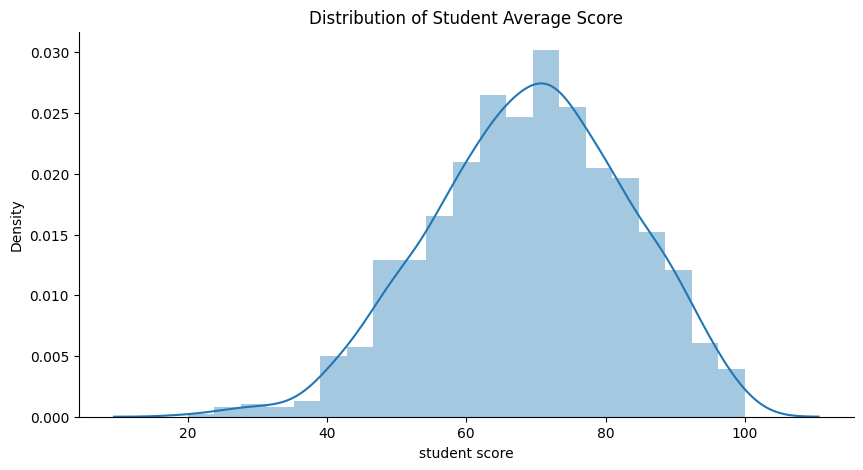

In [16]:
plt.figure(figsize=(10, 5))
#plt.subplots()
f = sns.distplot(data["student score"], kde = True)
display(np.std(data["student score"]))
plt.title("Distribution of Student Average Score", fontsize = 12 )
sns.despine()


This shows the Average student performance is inclined toward 40-80

#### Distribution of Student Score by Gender

<ipython-input-17-b44a40958c30>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["gender"] == "male"]["student score"], kde = True)


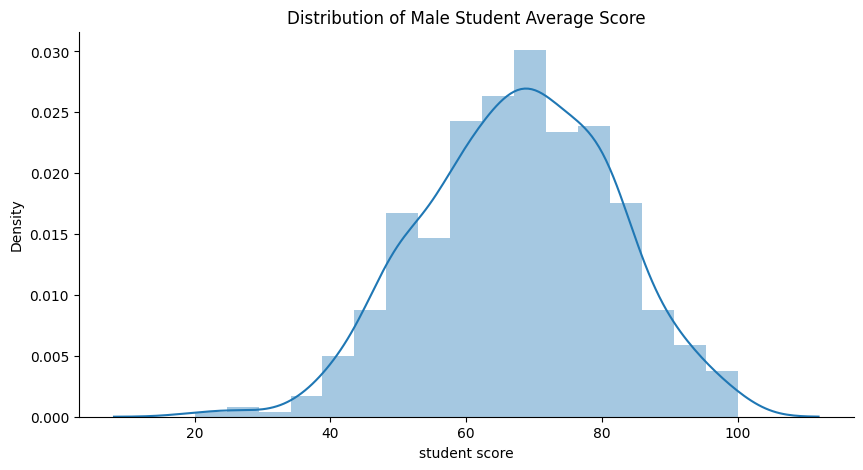

In [17]:
# Male Students Average score distribution
plt.figure(figsize=(10, 5))
sns.distplot(data[data["gender"] == "male"]["student score"], kde = True)
plt.title("Distribution of Male Student Average Score", fontsize = 12 )

sns.despine()
plt.show()


#### Distribution of Student Score by Gender

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


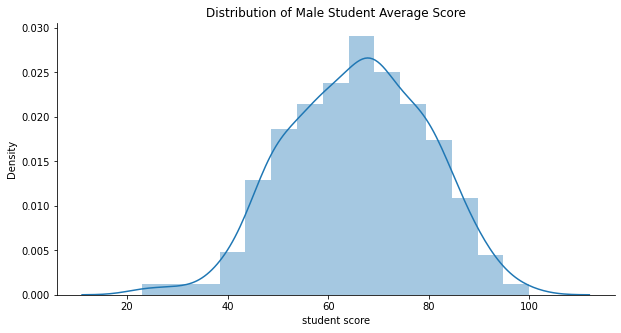

In [ ]:
# Male Students Average score distribution
plt.figure(figsize=(10, 5))
sns.distplot(dataset_[dataset_["gender"] == "male"]["student score"], kde = True)
plt.title("Distribution of Male Student Average Score", fontsize = 12 )

sns.despine()
plt.show()


Distribution of Female Student Average Score

<ipython-input-19-f9c7e7de554b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["gender"] == "female"]["student score"], kde = True)


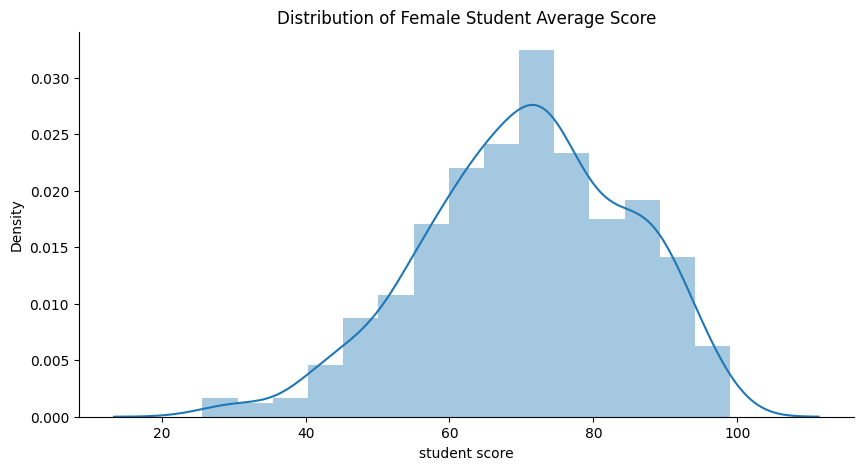

In [19]:
# Female Students Average score distribution
plt.figure(figsize=(10, 5))
sns.distplot(data[data["gender"] == "female"]["student score"], kde = True)
plt.title("Distribution of Female Student Average Score", fontsize = 12 )

sns.despine()
plt.show()

Between the Male & Female distribution, we can see that a higher number of female Students are more distributed towards the higher average score.

## Classification of students by grade class

In [20]:
 df = data["grade class"].value_counts()

In [21]:
fd = (df/1000)*100

In [22]:
lab = data["grade class"].unique()

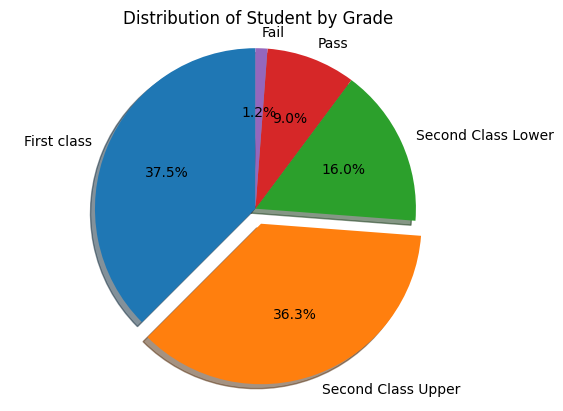

In [23]:
# Bar chart

labels = lab
values = fd
explode = (0,0.1,0,0,0)

fg1, ax1 = plt.subplots()
ax1.pie(fd, labels = labels, explode = explode, autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis("equal")
plt.title("Distribution of Student by Grade", fontsize = 12 )

plt.show()

## Further Analysis 

Let's look at how each variable affect the overall performance of students

### Gender

<Figure size 1200x500 with 0 Axes>

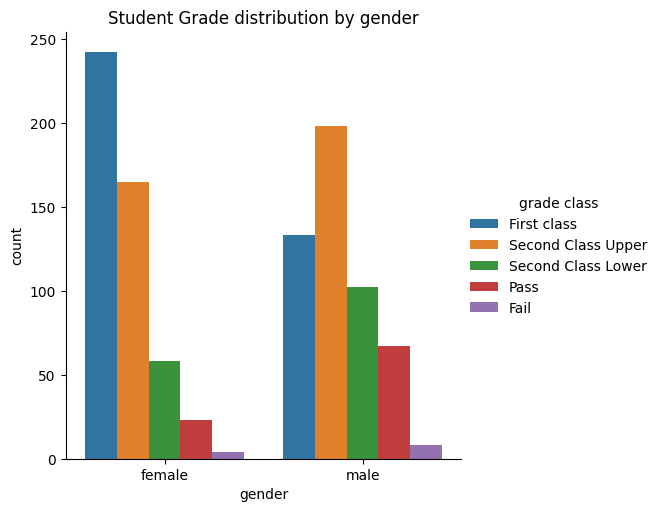

In [24]:
#Map showing relationship between Gender and grade class
hue = ['First class', 'Second Class Upper', 'Second Class Lower', 'Pass',
       'Fail']
plt.figure(figsize=(12, 5))

sns.catplot(x="gender", kind = "count", hue = "grade class", hue_order = hue, data = data)
plt.title("Student Grade distribution by gender", fontsize = 12 )
plt.show()


This Shows the female gender has more First Class students compared to make and almost same amount of Second Class Upper students

###Distribution Of Parental Education Level and Race/ethnicity

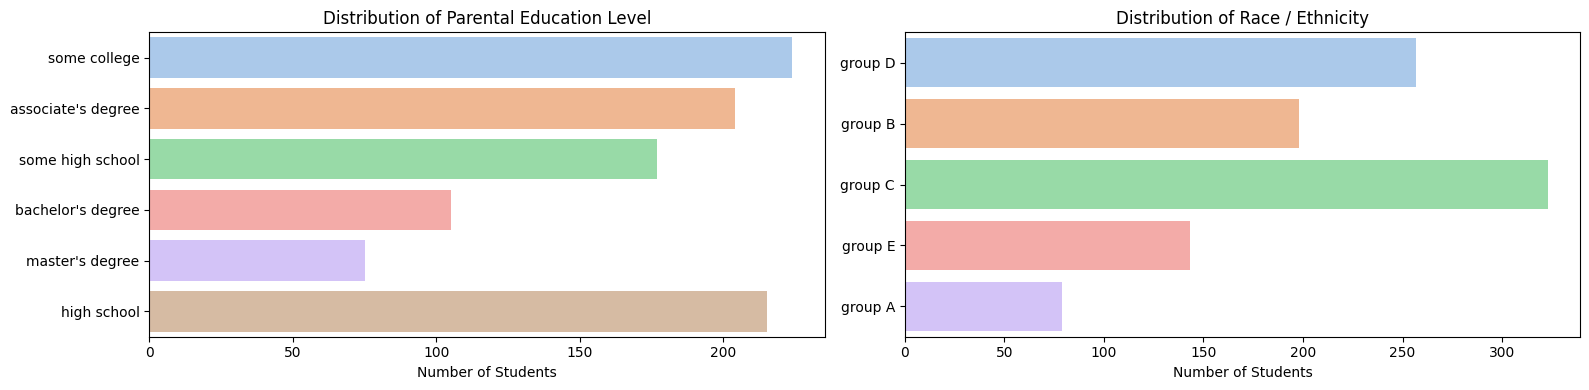

In [27]:
# Set the color palette
palette = sns.color_palette("pastel")

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Create the first subplot for the countplot of parental level of education
sns.countplot(y="parental level of education", data=data, ax=axs[0], palette=palette)
axs[0].set_title('Distribution of Parental Education Level')

# Create the second subplot for the countplot of race/ethnicity
sns.countplot(y="race/ethnicity", data=data, ax=axs[1], palette=palette)
axs[1].set_title('Distribution of Race / Ethnicity')

# Set the y-labels for both subplots
axs[0].set_ylabel('')
axs[1].set_ylabel('')

# Set the x-labels for both subplots
axs[0].set_xlabel('Number of Students')
axs[1].set_xlabel('Number of Students')

# Increase the distance between subplots
fig.subplots_adjust(wspace=0.5)

# Set the tight layout
plt.tight_layout()

# Display the plot
plt.show()

This indicates that Group C performs better compared to other groups

## Performance by Race/Ethnicity and Grade Class

<Figure size 1000x1000 with 0 Axes>

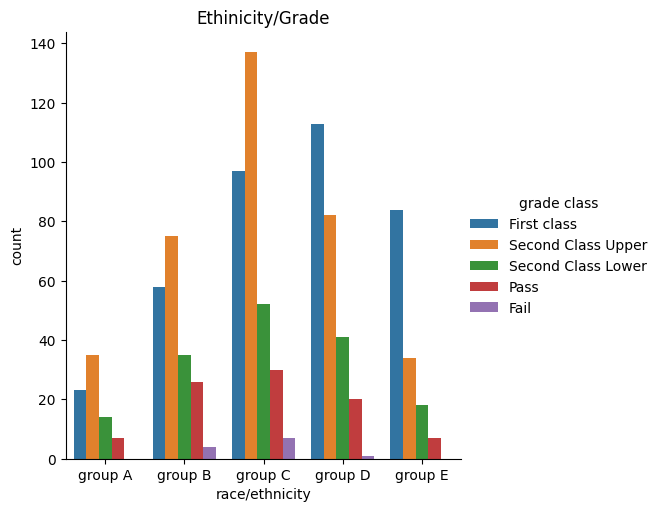

In [30]:
#Map showing relationship between race/ethnicity and grade class
rac = ['First class', 'Second Class Upper', 'Second Class Lower', 'Pass',
       'Fail']
racc = ["group A", "group B", "group C", "group D", "group E"]

plt.figure(figsize=(10, 10))
sns.catplot(x="race/ethnicity", kind = "count", order = racc, hue = "grade class", hue_order = rac, data = data)
plt.title("Ethinicity/Grade", fontsize = 12 )

plt.show()

###Distribution of Scores based on gender

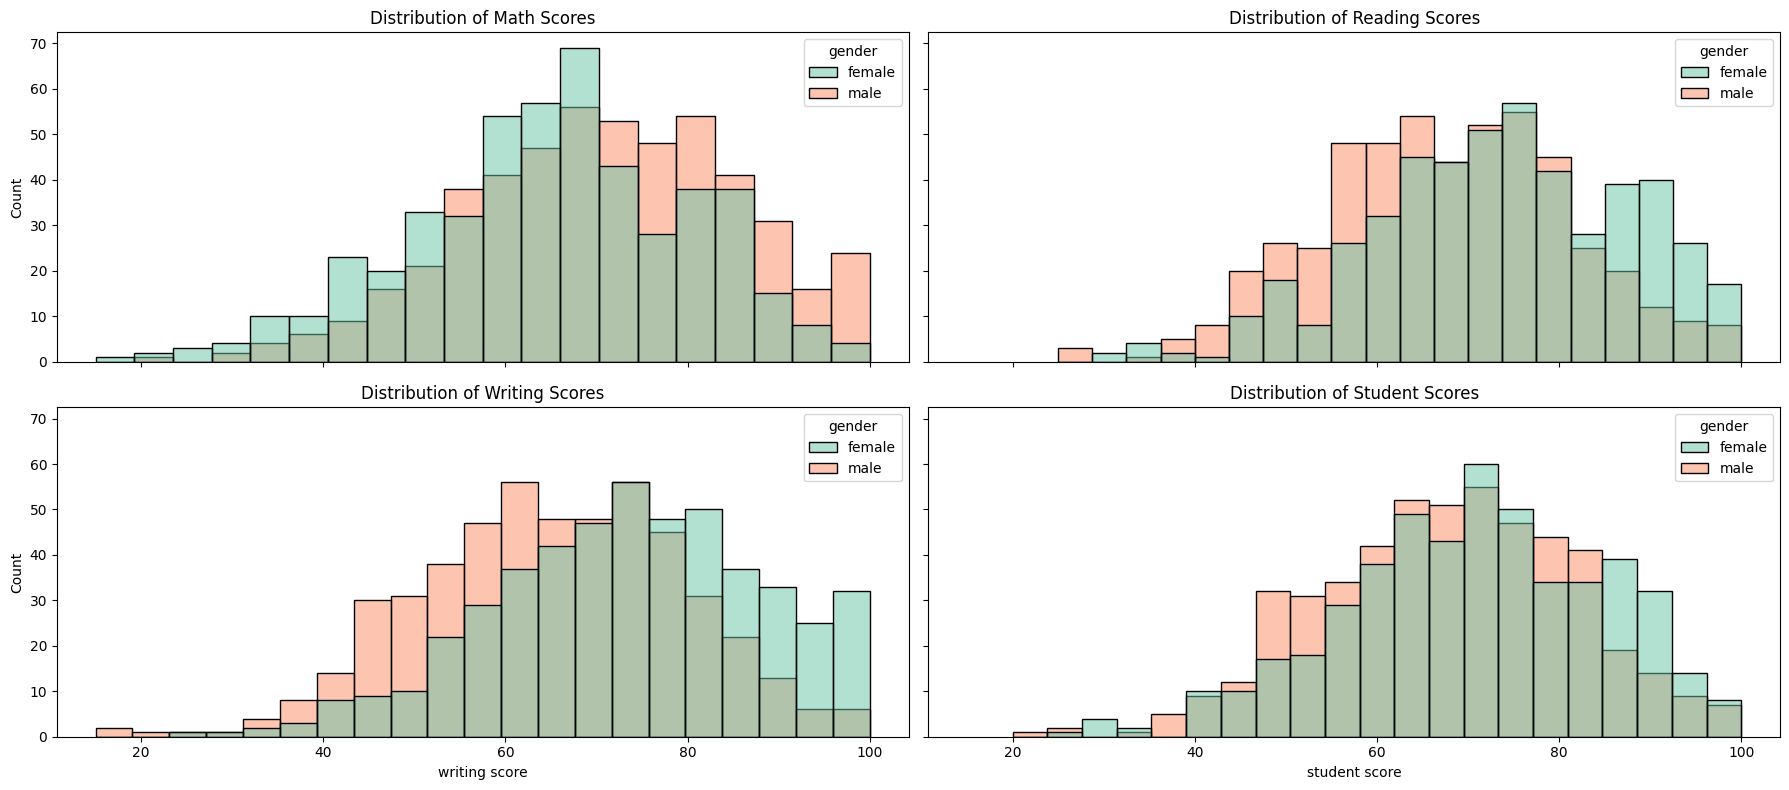

In [29]:
# Set the color palette
palette = sns.color_palette("pastel")

# Create a figure with three subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharey=True, sharex = True)

# Create the first subplot for the distribution of math scores
sns.histplot(x="math score", data=data, ax=axs[0, 0], hue = 'gender', palette="Set2")
axs[0, 0].set_title('Distribution of Math Scores')

# Create the second subplot for the distribution of reading scores
sns.histplot(x="reading score", data=data, ax=axs[0, 1],hue = 'gender', palette="Set2")
axs[0, 1].set_title('Distribution of Reading Scores')

# Create the third subplot for the distribution of writing scores
sns.histplot(x="writing score", data=data, ax=axs[1, 0],hue = 'gender', palette="Set2")
axs[1, 0].set_title('Distribution of Writing Scores')

# Create the third subplot for the distribution of writing scores
sns.histplot(x="student score", data=data, ax=axs[1, 1],hue = 'gender', palette="Set2")
axs[1, 1].set_title('Distribution of Student Scores')

# Increase the distance between subplots
fig.subplots_adjust(wspace=0.3)

# Set the tight layout
plt.tight_layout()

# Display the plot
plt.show()


## Performance by Parental Level of Education and Grade Class

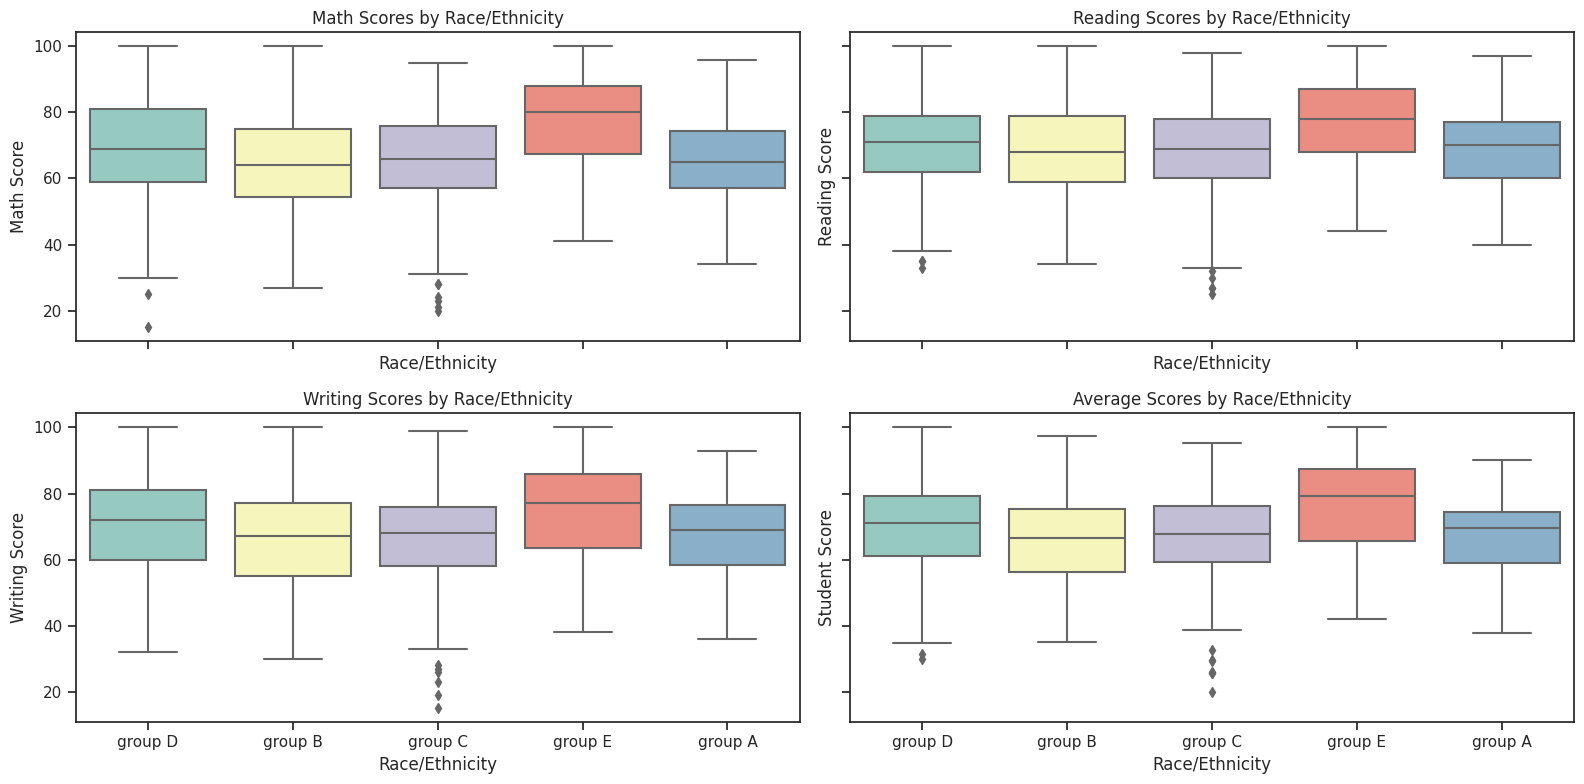

In [33]:
sns.set(style="ticks", palette="pastel")

# Create a figure with three subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 8), sharey = True, sharex = True)

# Create the first subplot for boxplot 1
sns.boxplot(x="race/ethnicity", y = "math score", data=data, ax=axs[0, 0], palette="Set3")
axs[0, 0].set_title('Math Scores by Race/Ethnicity')
axs[0, 0].set_xlabel('Race/Ethnicity')
axs[0, 0].set_ylabel('Math Score')

# Create the second subplot for boxplot 2
sns.boxplot(x="race/ethnicity", y = "reading score", data=data, ax=axs[0, 1], palette="Set3")
axs[0, 1].set_title('Reading Scores by Race/Ethnicity')
axs[0, 1].set_xlabel('Race/Ethnicity')
axs[0, 1].set_ylabel('Reading Score')

# Create the third subplot for boxplot 3
sns.boxplot(x="race/ethnicity", y="writing score", data=data, ax=axs[1, 0], palette="Set3")
axs[1, 0].set_title('Writing Scores by Race/Ethnicity')
axs[1, 0].set_xlabel('Race/Ethnicity')
axs[1, 0].set_ylabel('Writing Score')

# Create the third subplot for boxplot 4
sns.boxplot(x="race/ethnicity", y="student score", data=data, ax=axs[1, 1], palette="Set3")
axs[1, 1].set_title('Average Scores by Race/Ethnicity')
axs[1, 1].set_xlabel('Race/Ethnicity')
axs[1, 1].set_ylabel('Student Score')

# Increase the distance between subplots
fig.subplots_adjust(wspace=0.4)

# Set the tight layout
plt.tight_layout()

# Display the plot
plt.show()

###Distribution of Student Score Parental Level Of Education

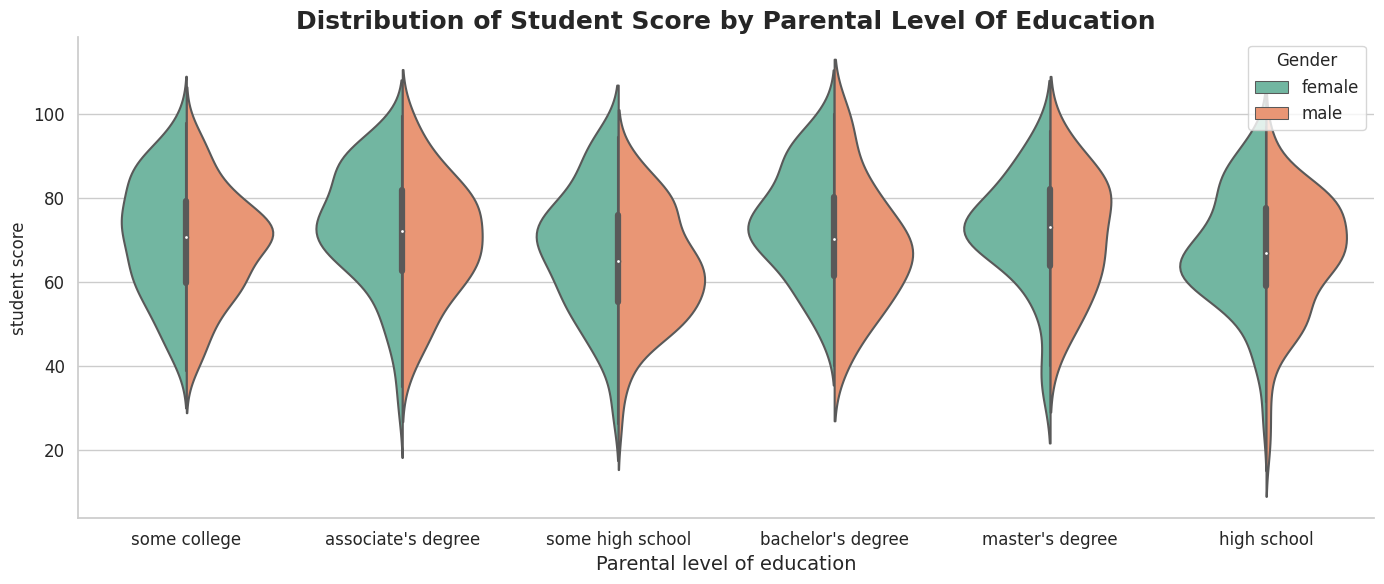

In [46]:
# Set the size of the figure
fig, ax = plt.subplots(figsize=(14, 6))

# Set the style of the plot
sns.set_style("whitegrid")

# Create a violin plot with gender as hue, split by gender
sns.violinplot(x="parental level of education", y="student score", hue="gender", data=data, palette="Set2", split = True, ax=ax)

# Add a title and axis labels
ax.set_title("Distribution of Student Score by Parental Level Of Education", fontsize=18, fontweight='bold')
ax.set_xlabel("Parental level of education", fontsize=14)

# Increase the font size of the tick labels
ax.tick_params(axis='both', labelsize=12)

# Add a legend
ax.legend(title="Gender", loc="upper right", fontsize=12)

# Remove top and right spines
sns.despine()
plt.tight_layout()
# Display the plot
plt.show()

###Distribution of Student Score by Lunch and Test Preparation

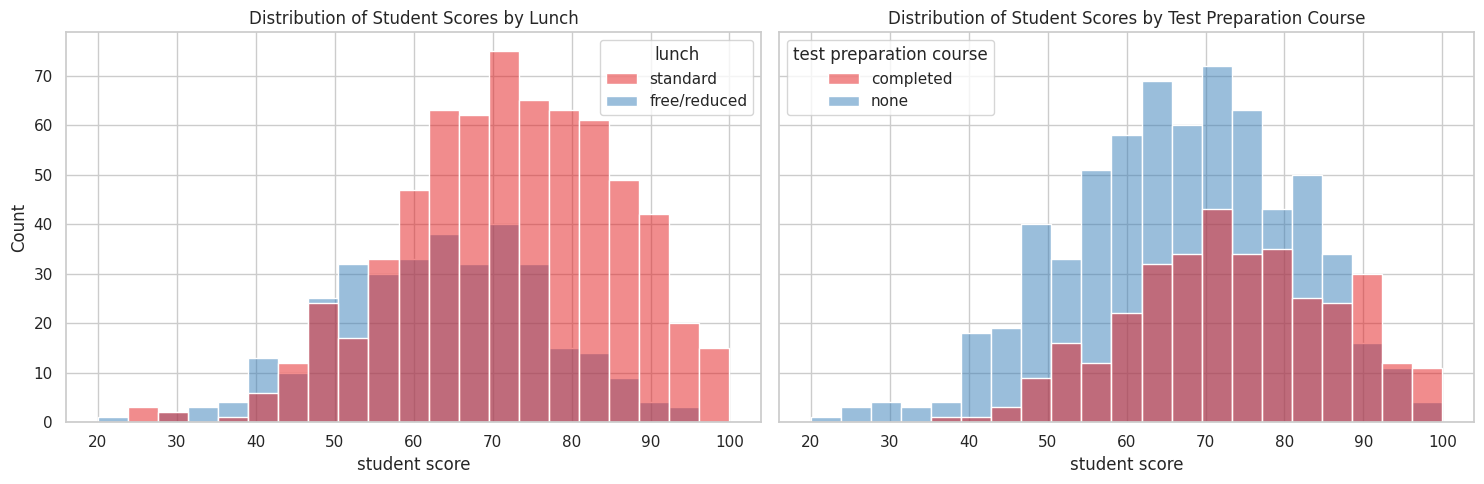

In [45]:
# Set the color palette
palette = sns.color_palette("pastel")

# Create a figure with three subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex = True)

# Create the third subplot for the distribution of writing scores
sns.histplot(x="student score", data=data, ax=axs[0],hue = 'lunch', palette="Set1")
axs[0].set_title('Distribution of Student Scores by Lunch')

# Create the third subplot for the distribution of writing scores
sns.histplot(x="student score", data=data, ax=axs[1],hue = 'test preparation course', palette="Set1")
axs[1].set_title('Distribution of Student Scores by Test Preparation Course')

# Increase the distance between subplots
fig.subplots_adjust(wspace=0.5)

# Set the tight layout
plt.tight_layout()

# Display the plot
plt.show()


###Correlation Matrix Of Student Scores

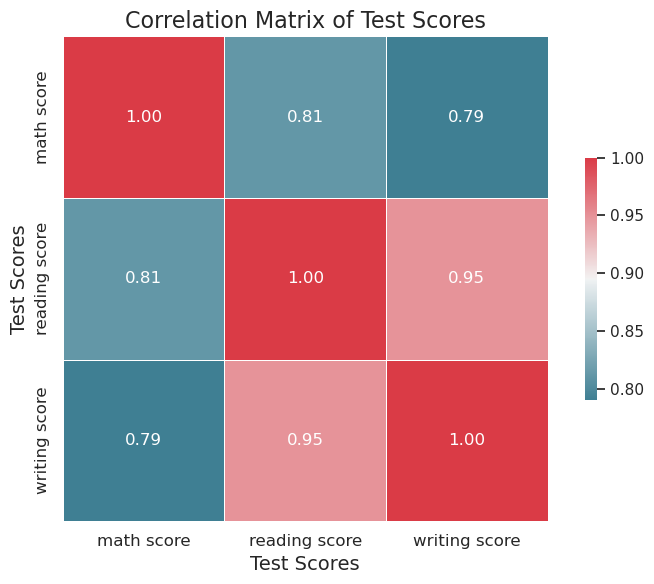

In [ ]:
# Subset the data to the relevant columns
scores = data[['math score', 'reading score', 'writing score']]

# Compute the correlation matrix
corr = scores.corr()

# Define a custom color scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap=cmap, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the plot title and axis labels
plt.title('Correlation Matrix of Test Scores', fontsize=16)
plt.xlabel('Test Scores', fontsize=14)
plt.ylabel('Test Scores', fontsize=14)

# Set the font size of the annotations
plt.tick_params(axis='both', labelsize=12)

# Adjust the layout to prevent the title from being cut off
plt.tight_layout()

# Display the plot
plt.show()

#Reloading Dataset

In [48]:
df = pd.read_csv("/content/sample_data/exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


## Data Prep

In [49]:
#Average student score

avg = df.iloc[:, 5:8].mean(axis = 1)

In [50]:
df["Average Score"] = round(avg, 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
0,female,group D,some college,standard,completed,59,70,78,69.0
1,male,group D,associate's degree,standard,none,96,93,87,92.0
2,female,group D,some college,free/reduced,none,57,76,77,70.0
3,male,group B,some college,free/reduced,none,70,70,63,67.7
4,female,group D,associate's degree,standard,none,83,85,86,84.7


In [51]:
#Create grade group
# 0-30.9 = Fail
#40-49.9 = Pass
#50-69.9 = Second Class Lower
#70-79.9 = Second Class Upper
#80-100 = First Class


criteria = (df["Average Score"].between(0.0, 39.9), df["Average Score"].between(40.0, 49.9),
      df["Average Score"].between(50.0, 69.9), df["Average Score"].between(70.0, 79.9), df["Average Score"].between(80.0, 100))
values = ["fail", "pass", "second class lower", "second class upper", "first class"]

In [52]:
#Add grade column
df['Grade'] = np.select(criteria, values, 0)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,Grade
0,female,group D,some college,standard,completed,59,70,78,69.0,second class lower
1,male,group D,associate's degree,standard,none,96,93,87,92.0,first class
2,female,group D,some college,free/reduced,none,57,76,77,70.0,second class upper
3,male,group B,some college,free/reduced,none,70,70,63,67.7,second class lower
4,female,group D,associate's degree,standard,none,83,85,86,84.7,first class


In [53]:
df_f = df.drop(["Average Score", "Grade"], axis = 1)

In [54]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Logistic Regression Model

## Create Processing Pipeline
This is done to automate processing, so we can pass our raw data into the model directly and it gets preprocessed in the background. 

In [55]:
#OneHotEncoder for categorical data
cat_preprocessor = OneHotEncoder(handle_unknown = "ignore")

#StandardScaler for Numerical data
num_preprocessor = StandardScaler()

In [56]:
#using Dtype to select categorical features
x_cat = df_f.select_dtypes(include = "object").columns
#x_cat.head()

#use Dtype to select numerical features
x_num = df_f.select_dtypes(include = "int64").columns
#x_num.head()

In [57]:
#creating preprocessor
preprocessor = ColumnTransformer([
    ('one-hot-encoder', cat_preprocessor, x_cat),
    ('standard-scaler', num_preprocessor, x_num)])

In [58]:
#Creating instance of LogisticRegression
lr_model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [59]:
set_config(display='diagram')
lr_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  Index(['math score', 'reading score', 'writing score'], dtype='object'))])),
                ('logisticregression', LogisticRegression(max_iter=500))])

## Split into Features and Target

In [60]:
features = df_f.iloc[:, :8]
target = df.iloc[:, -1]

## Split Train Test

In [61]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=1 )

In [62]:
x_train.shape

(750, 8)

In [63]:
y_train.shape

(750,)

## Fit & Predict Model

In [64]:
mod = lr_model.fit(x_train, y_train)

In [65]:
pred = lr_model.predict(x_test)

In [66]:
lr_model.score(x_test, y_test)

0.968

In [82]:
# evaluate predictions
accuracy = accuracy_score(y_test, pred)
print('Accuracy Of Logistic regression model: %.2f' % (accuracy*100))

Accuracy Of Logistic regression model: 96.80


In [68]:
#Evaluation with Cross Validation

cv_lr = cross_validate(lr_model, features, target, cv=5)
cv_lr

{'fit_time': array([0.060601  , 0.04682183, 0.04940796, 0.05531287, 0.05864573]),
 'score_time': array([0.00621963, 0.00622678, 0.0064981 , 0.00670195, 0.00619292]),
 'test_score': array([0.96, 0.98, 0.93, 0.94, 0.91])}

In [69]:
scores = cv_lr["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.944 +/- 0.024


# Naïve Bayes

## Create Processing Pipeline

In [70]:
nb_model = make_pipeline(preprocessor, GaussianNB())

In [71]:
nb_model.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  Index(['math score', 'reading score', 'writing score'], dtype='object'))])),
                ('gaussiannb', GaussianNB())])

In [72]:
nb_pred = nb_model.predict(x_test)

In [83]:
# evaluate predictions
accuracy = accuracy_score(y_test, nb_pred)
print('Accuracy of Naive Bayes: %.2f' % (accuracy*100))

Accuracy of Naive Bayes: 79.20


In [74]:
#Evaluation with Cross Validation

cv_nb = cross_validate(nb_model, features, target, cv=5)
cv_nb

{'fit_time': array([0.04115152, 0.01118159, 0.01070118, 0.01085925, 0.01433945]),
 'score_time': array([0.00818372, 0.00571227, 0.00556779, 0.00569296, 0.00881839]),
 'test_score': array([0.705, 0.755, 0.775, 0.805, 0.63 ])}

In [75]:
scores = cv_nb["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.734 +/- 0.061


# Stochastic Gradient Descent

In [76]:
sgd_model = make_pipeline(preprocessor, SGDClassifier(loss = "modified_huber", shuffle = True, random_state = 101))

In [77]:
sgd_model.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  Index(['math score', 'reading score', 'writing score'], dtype='object'))])),
                ('sgdclassifier',
                 SGDClassifier(loss='modified_huber', random_state=101))])

In [78]:
sgd_pred = sgd_model.predict(x_test)

In [84]:
# evaluate predictions
accuracy = accuracy_score(y_test, sgd_pred)
print('Accuracy of Stochastic Gradient Descent: %.2f' % (accuracy*100))

Accuracy of Stochastic Gradient Descent: 83.20


In [80]:
#Evaluation with Cross Validation Accuracy

cv_sgd = cross_validate(sgd_model, features, target, cv=5)
cv_sgd

{'fit_time': array([0.03342557, 0.03824019, 0.03229713, 0.0301528 , 0.03074145]),
 'score_time': array([0.0071578 , 0.00662851, 0.0069859 , 0.00614405, 0.00685692]),
 'test_score': array([0.755, 0.695, 0.585, 0.685, 0.605])}

In [81]:
scores = cv_sgd["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.665 +/- 0.062


##Conclusion:
This brings us to an end to the student’s performance prediction. Let us review our work. First, we started by defining our problem statement, looking into the algorithms we were going to use and the regression implementation pipeline. Then we moved on to practically implementing the identification and regression algorithms like Logistic Regression and other algorithms. Moving forward, we compared the performances of these models. Lastly, we built a logistic regression model that proved that it works best for student performance prediction problems.

The key takeaways from this  student performance prediction are:

Identification of student performance prediction is important for many institutions.
Logistic regression gives better accuracy compared to other regression problems.
Logistic regression is the best fit for the problem
Logistics regression provides an accuracy of 96%, giving out the most accurate results.

###References - 
Dataset link - https://www.kaggle.com/code/raimiazeezbabatunde/student-performance-prediction/input
Code Referencees - https://www.analyticsvidhya.com/blog/2023/04/student-performance-analysis-and-prediction/
https://www.frontiersin.org/articles/10.3389/fpsyg.2021.698490/full
